In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import plotnine as gg
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn.manifold import TSNE
from palettable.colorbrewer.sequential import *
from pathlib import Path
import umap.umap_ as umap
from scipy import stats
from scipy.stats import ttest_ind


In [3]:

outpath = "/Users/habbasi/Documents/Github/broadinstitute/ProteinKinase_NathianelGray/Figures/UMAP/All_drugs/"

## Data Paths

In [7]:
path = Path("../collated/")
#outpath = Path("/Welch_ttest/")
fname = "C-7210-01-CMP-008-gray_collapsed_sampled.csv"
fpath = os.path.join(path, fname)
df = pd.read_csv(fpath)


metadata = [col for col in df.columns if "Metadata" in col]
var = [col for col in df.columns if not "Metadata" in col]

## Note some of the Costes features are not removed
exclude_var = ['Cells_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_Costes_DNA_RNA']

variables = [v for v in var if v not in exclude_var]
len(variables)

595

## UMAP

In [111]:
np.random.seed(123)
reducer=umap.UMAP()
embedding = reducer.fit_transform(df.loc[:, variables].values)


test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(df.loc[:, metadata], left_index=True, right_index=True)




In [112]:
combined.columns

Index(['UMAP-1', 'UMAP-2', 'Metadata_Plate', 'Metadata_Well',
       'Metadata_broad_sample', 'Metadata_Assay_Plate_Barcode',
       'Metadata_Plate_Map_Name', 'Metadata_cell_line',
       'Metadata_well_position', 'Metadata_mg_per_ml',
       'Metadata_mmoles_per_liter', 'Metadata_solvent', 'Metadata_cell_id',
       'Metadata_pert_id', 'Metadata_pert_mfc_id', 'Metadata_pert_well',
       'Metadata_pert_id_vendor', 'Metadata_broad_sample_type',
       'Metadata_pert_vehicle', 'Metadata_pert_type', 'Metadata_label',
       'Metadata_chemist', 'Metadata_compound_name', 'Metadata_Annotation',
       'Metadata_Target', 'Metadata_Broad_barcode'],
      dtype='object')

## Data structuring for analysis

In [114]:
combined['Metadata_Target'].replace([np.nan, 'CDK14 / pan-TAIRE'], ['Controls', 'CDK14_pan-TAIRE'], inplace=True)
combined['Metadata_Annotation'].replace('active ', 'active', inplace=True)
combined['Metadata_combined_name'] = combined['Metadata_compound_name'] + "_{" + combined['Metadata_Annotation'] + "}_" + combined['Metadata_Target']
combined['Metadata_test'] = combined['Metadata_compound_name'] + "_" + combined['Metadata_Annotation']
combined['Metadata_test'].replace(['DMSO_control', 'C4_control', 'C3_control', 'C2_control', 'C1_control'], 
                                                                       'Controls', inplace=True)



['Controls' 'FMF-03-146-1_active' 'BJP-06-115-3_inactive'
 'BJP-06-005-3_active' 'FMF-04-112-1_inactive' 'JWG-071_active'
 'PND-1186_active' 'FMF-04-159-2_covalent' 'AX15836_active'
 'BSJ-04-030_inactive (protac)' 'FMF-05-176-1_reversible'
 'JWG-119_inactive' 'BSJ-03-136_active (protac)']


## Plotting UMAP for all drugs

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Documents/Github/broadinstitute/ProteinKinase_NathianelGray/Figures/UMAP/All_drugs/umap_allcompounds.png


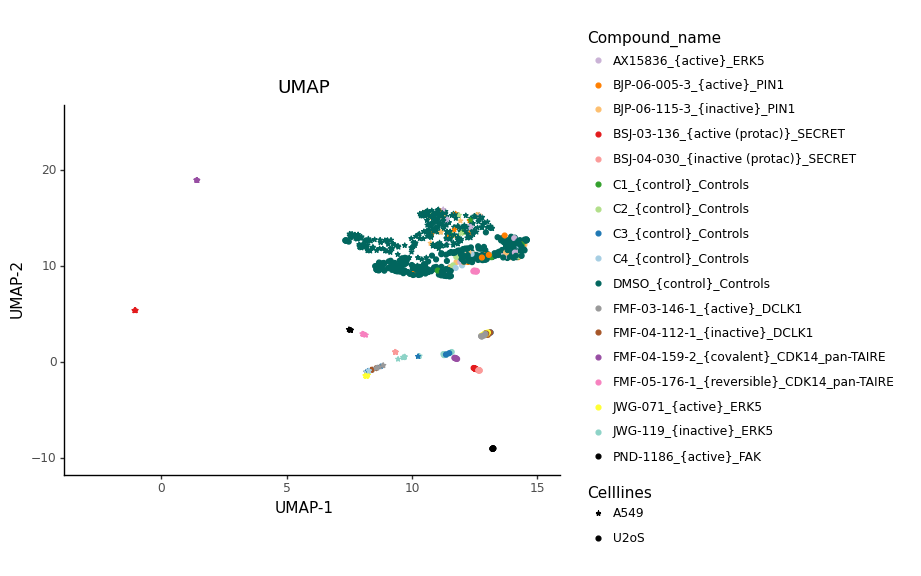

<ggplot: (7029802493)>

In [118]:

    
g = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_combined_name', shape="Metadata_cell_line")) + \
gg.geom_point(size = 1.5) + \
gg.xlab("UMAP-1") + \
gg.ylab("UMAP-2") + \
gg.ggtitle(i) + \
gg.xlim(-3,15) + \
gg.ylim(-10,25) + \
gg.theme_classic() + \
gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
                                                         "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
                                                         "#a6cee3", "#01665e", "#999999", "#a65628",
                                                         "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
                                                         "#000000"]) + \
gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o']) + \
gg.labs(title="UMAP")
ggsave(filename='umap_allcompounds.png', plot = g, path=outpath)
    
g    



## Plotting Umap for individual Target

In [120]:


lst = combined.Metadata_Target.unique()


lst = list(filter(lambda x: x != "Controls", lst))

for i in lst:
    options = ['Controls', i]
    d = combined.loc[combined['Metadata_Target'].isin(options)]
    
    g = gg.ggplot(d, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_test', shape="Metadata_cell_line")) + \
    gg.geom_point(size = 1.5) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle(i) + \
    gg.xlim(-15,20) + \
    gg.ylim(-10,25) + \
    gg.theme_classic() + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#ca0020","#2b83ba","#bababa","#756bb1"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])
    ggsave(filename='umap_' + i + '.png', plot = g, path=outpath)
    
    






['DCLK1', 'PIN1', 'ERK5', 'FAK', 'CDK14_pan-TAIRE', 'SECRET']

## T-SNE

In [121]:
# Fit and transform with t-SNE

from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, learning_rate=100, n_iter=1000, perplexity=30)


#Project the data in 2D 
x_2d = model.fit_transform(df.loc[:, variables].values)

test = pd.DataFrame(x_2d, columns= ['t-SNE-1', 't-SNE-2'])

combined = test.merge(df.loc[:, metadata], left_index=True, right_index=True)

combined['Metadata_Target'].replace([np.nan, 'CDK14 / pan-TAIRE'], ['Controls', 'CDK14_pan-TAIRE'], inplace=True)
combined['Metadata_Annotation'].replace('active ', 'active', inplace=True)
combined['Metadata_combined_name'] = combined['Metadata_compound_name'] + "_{" + combined['Metadata_Annotation'] + "}_" + combined['Metadata_Target']
combined['Metadata_test'] = combined['Metadata_compound_name'] + "_" + combined['Metadata_Annotation']
combined['Metadata_test'].replace(['DMSO_control', 'C4_control', 'C3_control', 'C2_control', 'C1_control'], 
                                                                       'Controls', inplace=True)



## Plotting

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Documents/Github/broadinstitute/ProteinKinase_NathianelGray/Figures/UMAP/All_drugs/Gray_project_t-SNE.png


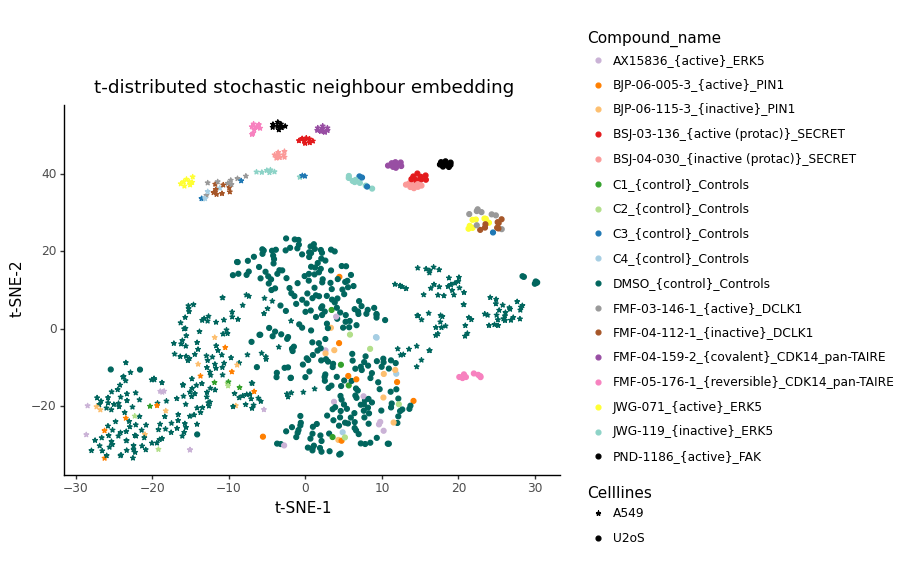

<ggplot: (304982557)>

In [124]:
p = gg.ggplot(combined, gg.aes(x='t-SNE-1', y='t-SNE-2', color='Metadata_combined_name', label='Metadata_compound_name', shape='Metadata_cell_line')) + \
    gg.geom_point() + \
    gg.theme_classic() + \
    gg.xlab("t-SNE-1") + \
    gg.ylab("t-SNE-2") + \
    gg.ggtitle("t-distributed stochastic neighbour embedding") + \
    gg.scale_colour_manual(name= 'Compound_name', values=["#cab2d6", "#ff7f00", "#fdbf6f", "#e31a1c",
                                                         "#fb9a99", "#33a02c","#b2df8a", "#1f78b4",
                                                         "#a6cee3", "#01665e", "#999999", "#a65628",
                                                         "#984ea3", "#f781bf", "#ffff33", "#8dd3c7",
                                                         "#000000"]) + \
    gg.scale_shape_manual(name="Celllines", labels=['A549', 'U2oS'], values=['*', 'o'])

    

ggsave(filename='Gray_project_t-SNE.png', plot = p, path = outpath)
    
p
